# Approximation of the kernel matrix.

Author: <alberto.suarez@uam.es>

In this notebook we illustrate the quality of the approximation to the kernel matrix using random features of different types (RBF, Matérn) and Nystöm features.

Note that even the best results for classification need not be obtained by the method that gives the best approximation to the kernel matrix. The reason is that the approximation can have a regularization effect that may improve the accuracy of the predictions on the test set.

In [49]:
%load_ext autoreload
%autoreload 2

## Load necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
from sklearn import datasets
from sklearn.kernel_approximation import RBFSampler
from sklearn.gaussian_process.kernels import Matern
import kernel_approximation as ka


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# of features =  10
# of features =  100
# of features =  1000
# of features =  10000


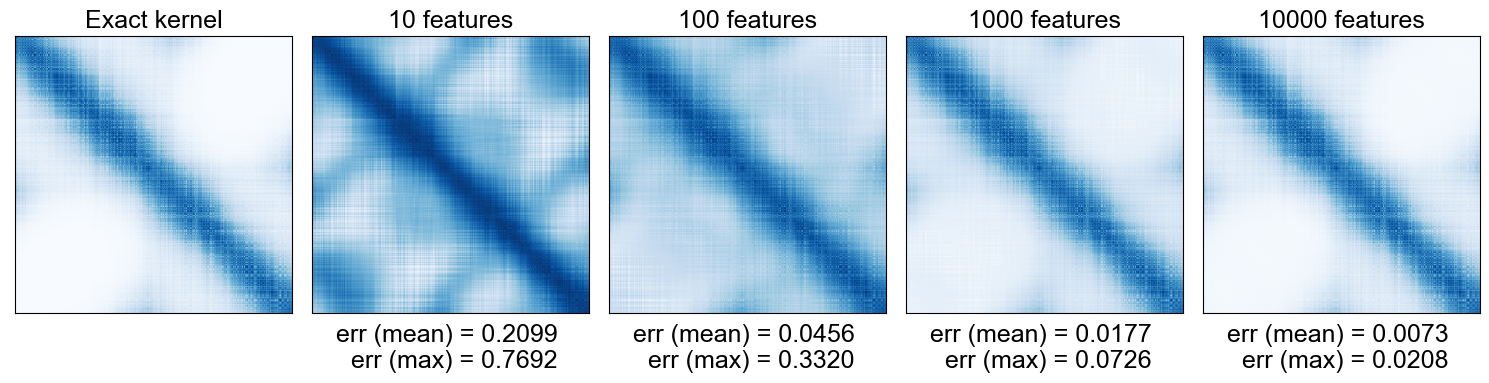

In [50]:
## Generate data
# 3-D data
n_instances = 1000
X, t = datasets.make_s_curve(n_instances, noise=0.1)
X = X[np.argsort(t)]

# Reshape if necessary
if (X.ndim == 1):
    X = X[:, np.newaxis]
    
# RBF kernel parameters 
sigma = 1.0
gamma = 1.0 / (2.0 * sigma**2)

# Kernel function
def kernel(X, Y):
    return rbf_kernel(X, Y, gamma=gamma) 

## Create an instance of the random features object
rbf_sampler = ka.RandomFeaturesSamplerRBF(sigma)

## Plot the approximation to the kernel matrix
n_random_features = [10, 100, 1000, 10000]

ka.demo_kernel_approximation_features(
    X, 
    kernel, 
    rbf_sampler,
    n_random_features
)



Tras visualizar los gráficos se aprecia claramente como un incremento en las características muestreadas, provoca una disminución de los errores del kernel, tanto para la media del error como para el máximo. En este caso, hemos sacado las gráficas hasta el caso de 10000 características, si siguieramos aumentando su número, podríamos preveer que el error medio acabaría siendo prácticamente 0. De este modo, a mayor carácterísticas sampleadas, menor error.

Veamos ahora un gráfico donde aparezca el comportamiento de ambos errores frente a las características muestreadas:

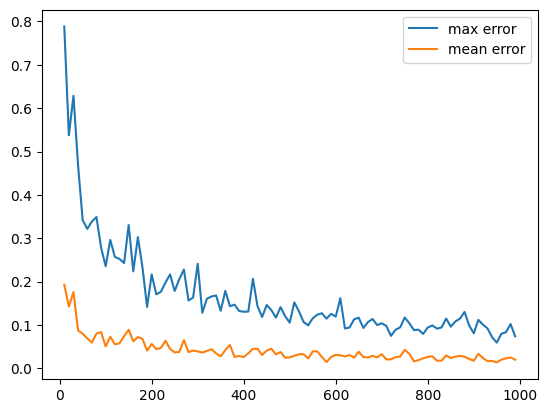

Correlation coefficient for mean error: [[ 1.         -0.70357701]
 [-0.70357701  1.        ]]
Correlation coefficient for max error: [[ 1.         -0.73444161]
 [-0.73444161  1.        ]]


In [51]:
ka.plot_error(X,kernel,rbf_sampler, 10000)

Fijándonos en ambos errores, podemos ver como la media del error presenta la tendencia a 0 que habíamos previsto. La curva presenta poca variabilidad, por lo que podríamos considerar que dicho error se aproxima a una curva racional. Lo mismo podemos suponer para el caso del error máximo. Además si observamos las matrices de correlación, vemos que la dependencia entre ambas variables es negativa, y próxima a uno, luego se confirma lo anteriormente dicho.

# of features =  10
# of features =  100
# of features =  1000
# of features =  10000


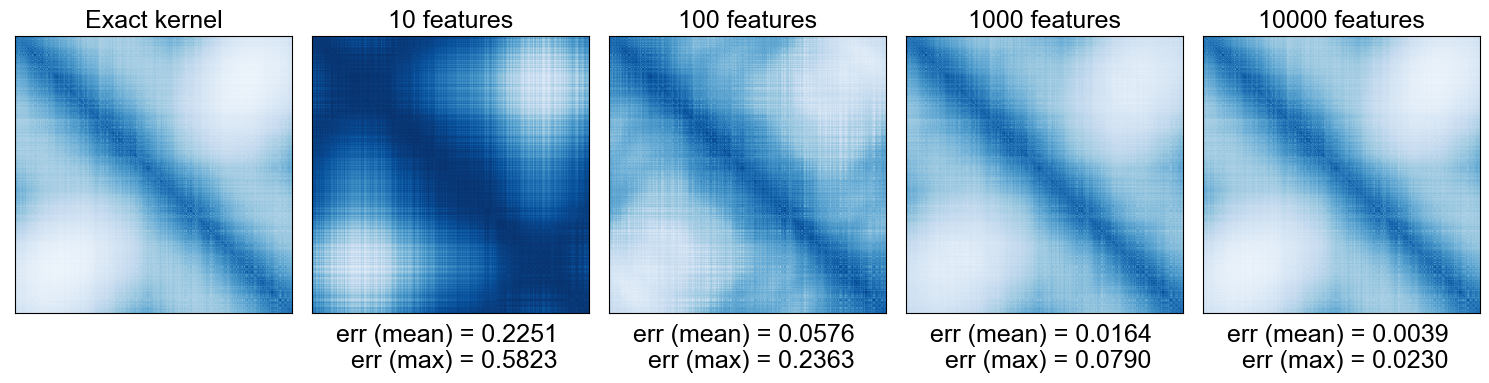

In [52]:
length_scale = 3.0
nu = 0.5

kernel_matern = Matern(length_scale=length_scale, nu=nu) 

def kernel(X, Y):
    return kernel_matern(X, Y)

matern_sampler = ka.RandomFeaturesSamplerMatern(length_scale, nu)    

n_random_features = [10, 100, 1000, 10000]

ka.demo_kernel_approximation_features(
    X, 
    kernel, 
    matern_sampler,
    n_random_features
)



Para este segundo caso donde hemos tomado los random features con el kernel Matern, el comportamiento del error al aumentar el número de características muestreadas es muy similar al caso anterior. Podemos apreciar como los valores de los errores para 10, 100, 1000 y 10000 carácterísticas son muy parecidos al caso de los random features con el kernel RBF. Esto nos puede indicar, que a medida que aumentamos dichas características los errores disminuyen con un orden prácticamente igual. 

Mirando la siguiente gráfica:

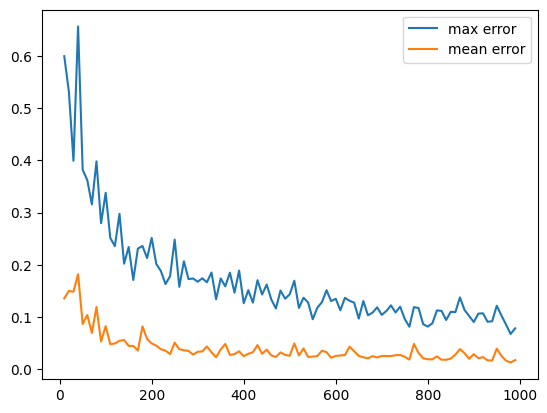

Correlation coefficient for mean error: [[ 1.         -0.65455475]
 [-0.65455475  1.        ]]
Correlation coefficient for max error: [[ 1.         -0.75549484]
 [-0.75549484  1.        ]]


In [53]:
ka.plot_error(X,kernel,matern_sampler, 10000)

Podemos observar como la tendencia a 0 de los errores a medida que crece el número de características se cumple. También se puede apreciar una mayor variabilidad a lo largo de la curva para ambos errores que en el caso de los random features para el kernel RBF. Fijándonos en la matriz de coeficientes de pearson, se aprecian resultados bastante similares al caso anterior, luego se confirma que ambas variables son inversamente proporcionales.

# of features =  10
# of features =  100
# of features =  1000


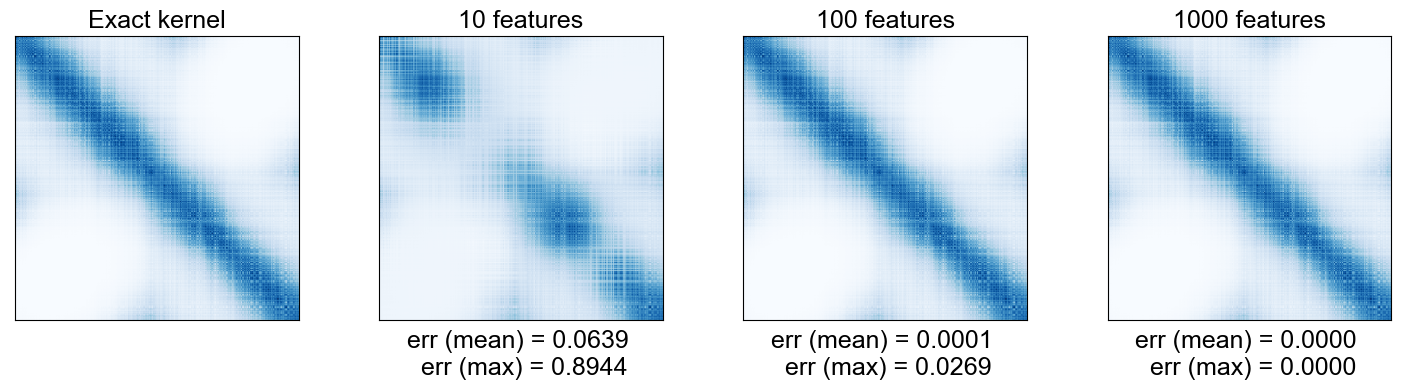

In [54]:
# Kernel parameters 
sigma = 1.0
gamma = 1.0 / (2.0 * sigma**2)

# Kernel matrix
def kernel(X, Y):
    return rbf_kernel(X, Y, gamma=gamma) 

nystroem_sampler = ka.NystroemFeaturesSampler(kernel)

n_nystroem_features = [10, 100, 1000]

ka.demo_kernel_approximation_features(
    X, 
    kernel, 
    nystroem_sampler,
    n_nystroem_features
)



Para este último caso, vemos que, al igual que los anteriores, un aumento en las características viene asociado a una disminución del error de aproximación del kernel. Pero a diferencia de los dos casos previos, esta disminución es mucho más precipitada. Observamos que con 1000 características ambos erroes son prácticamente 0. Esto nos dice que esta aproximación del kernel, nos da mejores resultados que los dos anteriores, pues su valor es practicamente el original con menos características sampleadas.

Tomando la gráfica de los errores frente al número de características:

c:\Users\Lenovo\Desktop\Master UAM\MF\MetodosFuncionalesAprendizajeAutomatico\HW_02\kernel_approximation.py:203: UserWarning: Maximum imaginary part is 1.2258717744230187e-06
  warnings.warn(
c:\Users\Lenovo\Desktop\Master UAM\MF\MetodosFuncionalesAprendizajeAutomatico\HW_02\kernel_approximation.py:203: UserWarning: Maximum imaginary part is 1.989899191999053e-06
  warnings.warn(


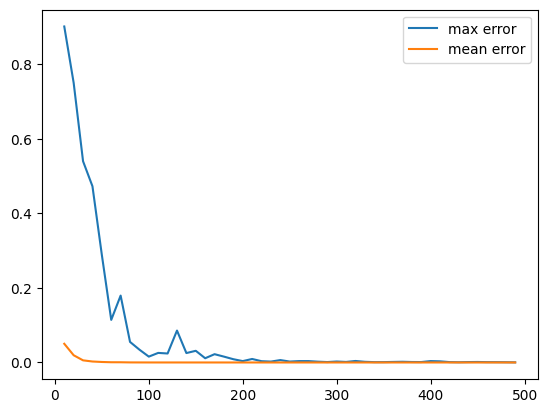

Correlation coefficient for mean error: [[ 1.         -0.36018282]
 [-0.36018282  1.        ]]
Correlation coefficient for max error: [[ 1.         -0.57861182]
 [-0.57861182  1.        ]]


In [55]:
ka.plot_error(X, kernel, nystroem_sampler, 1000)

Para este último caso podemos apreciar como la gráfica del error medio se hace 0 con muchas menos características que en los dos casos anteriores. Por otro lado, la curva no presenta variabilidad a simple vista. Con esto, podríamos concluir que este último método de aproximación para el kernel es el mejor de los tres. Para este caso el coeficiente de pearson para el error medio y las características, es bastante menor que en los casos anteriores, esto puede deberse a que al ser el error medio bastante próximo a cero desde el principio, no haya una caida clara en el valor de sus resultados a medida que se aumentan las features.

## Exercises
1. Implement the incomplete methods in *kernel_approximation.py*
2. Comment on the values of the error for the different approximations, and their dependence with the number of sampled features.
3. (Extra point) Determine de dependence of the mean error with the number of features for the different random feature models. Provide an explanation of this behavior.

El primer ejercicio se encuntra implementado en el archivo `kernel_approximation.py`, mientras que los otros dos aparecen resueltos y comentados a lo largo del archivo actual.

## Notes
1. For the implementation of the Nyström method, the following functions are useful:
* numpy.linalg.pinv [ https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html ].
* scipy.linalg.sqrtm  [ https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.sqrtm.html ].
